In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
seed(12045)
N = 300
X = np.random.uniform(-1,1,(N,2))

X = np.insert(X,2, np.ones(N),axis=1)

# Create a circle pattern with labels for each X[i]
Y = (np.sqrt(X[:,0]**2 + X[:,1]**2)<.75).astype(int)
#print(Y)

# Diamond pattern
#Y = ((np.abs(X[:,0]) + np.abs(X[:,1]))<1).astype(int)

# Centered square
#Y = ((np.maximum(np.abs(X[:,0]), np.abs(X[:,1])))<.5).astype(int)

# Thick right angle pattern
#Y = (((np.maximum((X[:,0]), (X[:,1])))<.5) & ((np.maximum((X[:,0]), (X[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
#Y = (((np.maximum((X[:,0]), (X[:,1])))<.5) & ((np.maximum((X[:,0]), (X[:,1])))>0)).astype(int)

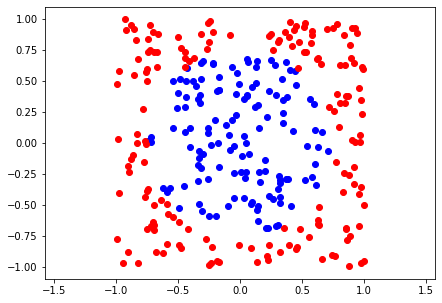

In [ ]:
def plot_data():
  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(111)
  ax.scatter(X[Y==1,0],X[Y==1,1], label = 'blue', c='b')
  ax.scatter(X[Y==0,0],X[Y==0,1], label = 'red', c = 'r')
  ax.axis('equal')
  plt.show()

plot_data()

In [ ]:
from pyparsing.util import LRUMemo
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# error function
def J(Y, y_hat):
    return -1/N * ( np.dot(Y, np.log(y_hat)) + np.dot((1 - Y), np.log(1 - y_hat)) )

# forward pass
def forward(W1, W2, predict=False):
    # layer 1
    z1 = np.dot(X, W1) 
    H = sigmoid(z1)

    # layer 2
    z2 = np.dot(H, W2) 
    y_hat = sigmoid(z2) 

    if predict:
        return y_hat

    # derivatives (2nd layer)
    D_J_z2 = y_hat - Y           # dJ/dy_hat * dy_hat/dz2
    D_J_W2 = np.dot(H.T, D_J_z2) # dJ/dy_hat * dy_hat/dz2 * dz2/dW2

    # derivatives (1st layer)
    D_J_H = np.dot(D_J_z2.reshape(-1,1), W2.reshape(-1,1).T) # dJ/dy_hat * dy_hat/dz2 * dz2/dH
    D_H_z1 = sigmoid(z1)*(1 - sigmoid(z1))                   # dH/dz1
    D_J_W1 = np.dot(X.T, (D_J_H * D_H_z1))                   # dJ/H * dH/dz1 * dz1/dW1

    return D_J_W1/N, D_J_W2/N 

# fit model to data (backpropagation)
def fit(W1, W2, LR, epochs):
    for i in range(epochs):
        # Forward pass:
        D_W1, D_W2 = forward(W1, W2) 
        # update weights
        W1 -= D_W1*LR        
        W2 -= D_W2*LR
        # update loss and accuracy:
        if i%1000 == 0: # every 1000th iteration
            y_hat = forward(W1, W2, predict=True)
            acc = sum((y_hat>=0.5) == Y)/N
            loss = J(Y, y_hat)
            loss_history.append(loss)
            acc_history.append(acc)
    return W1, W2 

# MAIN
# parameters:
LR = 0.1
epochs = 15000

# save loss and accuracy history
loss_history = []
acc_history = []

n = 5 #number of neurons on hiddden layer

W1 = np.random.uniform(0,1,(3,n))
W2 = np.random.uniform(0,1,(n,))

W1, W2 = fit(W1, W2, LR, epochs)
# slope and the interceptor
y_hat = forward(W1,W2, predict=True)

[[116  18]
 [  3 163]]
accuracy = 0.93
precision = 0.9747899159663865
recall = 0.8656716417910447
F(1) score =  0.9169960474308301


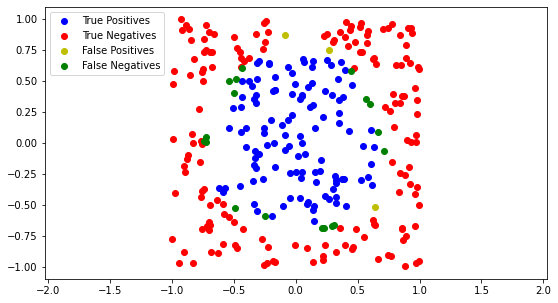

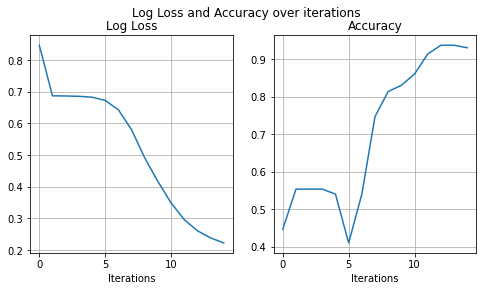

In [ ]:
# EVALUATION METRICS

# PLOT LOSS AND ACCURACY HISTORY
def plot_loss_accuracy(loss_history, acc_history):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    # add_subplot(nrows, ncolumns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_history)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc_history)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Accuracy')

# PLOT PREDICTIONS
def plot_predictions(TP, TN, FP, FN):
    fig = plt.figure(figsize=(9, 5))

    ax = fig.add_subplot(1, 1, 1)    

    # True predictions
    ax.scatter(TP[:, 0], TP[:, 1], label="True Positives", c='b')
    ax.scatter(TN[:, 0], TN[:, 1], label="True Negatives", c='r')
    # False predictions
    ax.scatter(FP[:, 0], FP[:, 1], label="False Positives", c='y')
    ax.scatter(FN[:, 0], FN[:, 1], label="False Negatives", c='g')
    ax.axis('equal')
    ax.legend(loc='upper left')
    #plt.show()
    
# F BETA SCORE
def F_beta_score(b, p, r):
    return (1 + b**2) * ((p*r) / ((b**2 * p) + r))

# PRINT ERROR/EVALUATION METRICS
def metrics(TP, TN, FP, FN):
    # Confusion matrix
    M = np.array([[len(TP), len(FN)], 
                  [len(FP), len(TN)]])

    # Error metrics
    accuracy = sum(np.diag(M))/N
    precision = M[0][0]/sum(M[:,0])
    recall = M[0][0]/sum(M[0,:])

    print(M)
    print("accuracy =", accuracy)
    print("precision =", precision)
    print("recall =", recall)
    print('F(1) score = ', F_beta_score(1, precision, recall))
    #print('F(0.5) score = ', F_beta_score(0.5, precision, recall))
    #print('F(2) score = ', F_beta_score(2, precision, recall))

# PREDICTIONS
pred1 = (y_hat >= 0.5) # True if predicted as 1
pred0 = (y_hat < 0.5)  # True if predicted as 0

TP = X[pred1 & (Y==1), :] # True positives
TN = X[pred0 & (Y==0), :] # True negatives
FP = X[pred1 & (Y==0), :] # False positives
FN = X[pred0 & (Y==1), :] # False negatives

# Display metrics
metrics(TP, TN, FP, FN)
plot_predictions(TP, TN, FP, FN)    
plot_loss_accuracy(loss_history, acc_history)

In [ ]:
#circle n = 5, epochs = 15000 lr = 0.1
#diamond n = 6, epochs = 1500 lr = 0.1
#square n =6 epochs = 2400 lr = 0.07
#thicc n= 8 epochs = 25000 lr = 0.08
#thin n = 8, epochs = 20000 lr = 0.08